# Doğrusal Olmayan Regresyon

Eğer ki elimizdeki veri setinin grafiği doğrusal olmayan bir eğri çiziyor ise analiz için linear metodlar kullanmak doğru olmayacaktır. Tabi öncelikli olarak hangi tipteki fonksiyların doğrusal olmadığını ve grafik olarak nasıl görüneceğine bakalım.

## Linear (Doğrusal) Fonksiyon

y=2x+3 gibi bir fonksiyon ile ifade edilebilen, bağımsız değişkendeki her değişiklikte aynı oranda değişiklik gösteren fonksiyondur.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

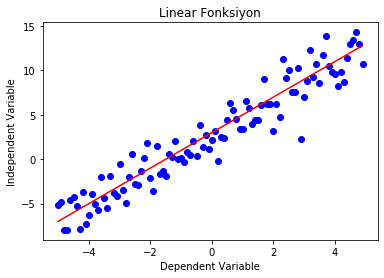

In [6]:
x=np.arange(-5.0,5.0,0.1)
y=2*x+3 # temel fonksiyonumuz
y_noise=2*np.random.normal(size=x.size) # Normal dağılıma sahip random farklar yaratıyorum. Sahte veri noktaları için
ydata=y+y_noise # Sahte veri noktaları oluşturuyorum.
plt.plot(x,ydata,"bo")
plt.plot(x,y,"r")
plt.xlabel("Dependent Variable")
plt.ylabel("Independent Variable")
plt.title("Linear Fonksiyon")
plt.show()


## Non-Linear Function (Doğrusal Olmayan Foksiyon)

Linear olarak ifade edilemeyen her fonksiyon için non-linear denilebilir. Bu fonksiyon tipi aşağıdaki şekillerde yada bunların birleşimi olan daha karmaşık şekillerde ifade edilebilir. 
* $\ y = a x^3 + b x^2 + c x + d \ $ Üslü polynomial fonksiyon
* $\ y = \log(x)$ Logaritmik fonksiyon
* $ y = \log(a x^3 + b x^2 + c x + d)$ Daha kompleks başka bir örnek

***Qubic function graph (Üçüncü dereceden fonksiyon grafiği)***

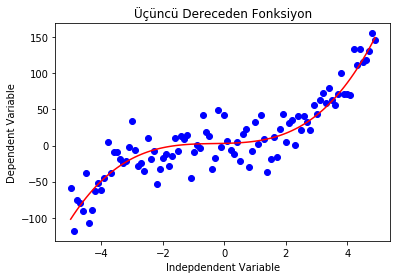

In [8]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph
y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.title("Üçüncü Dereceden Fonksiyon")
plt.show()

***Quadratic Function (İkinci Dereceden)***

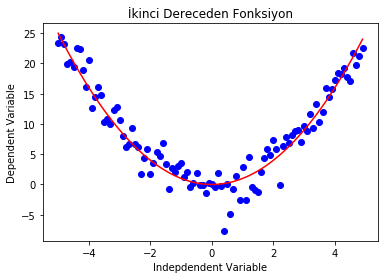

In [9]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph
y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.title("İkinci Dereceden Fonksiyon")
plt.show()

***Exponential Function (Exponansiyel Fonksiyon)***

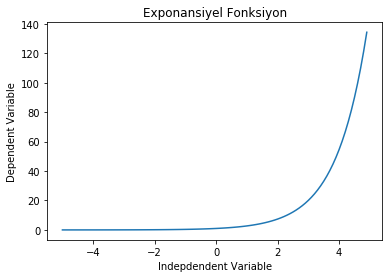

In [13]:
X = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

Y= np.exp(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.title("Exponansiyel Fonksiyon")
plt.show()

***Logarithmic Function (Logaritmik Fonksiyon)***

<ipython-input-17-6fa6b28902e1>:3: RuntimeWarning: invalid value encountered in log
  Y = np.log(X)


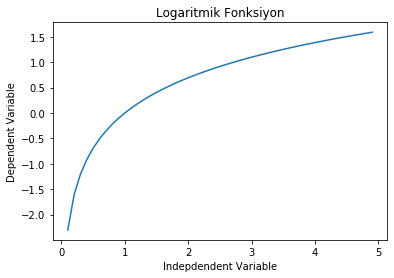

In [17]:
X = np.arange(-5.0, 5.0, 0.1)

Y = np.log(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.title("Logaritmik Fonksiyon")
plt.show()

***Sigmoidal/Logistic Function (Sigmoid/Lojistic Fonksiyon)***

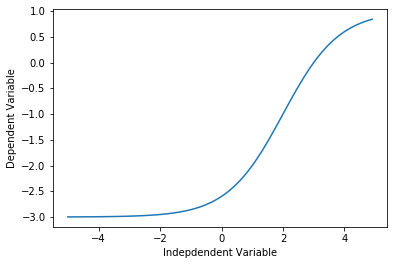

In [18]:
X = np.arange(-5.0, 5.0, 0.1)


Y = 1-4/(1+np.power(3, X-2))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

Şimdi ise veriler üzerinden non-linear regresyon analizi yapalım. Bunun için Çin'in GDP(GSYH) değerini inceleyeceğiz.

In [19]:
import numpy as np
import pandas as pd

df = pd.read_csv("china_gdp.csv")
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


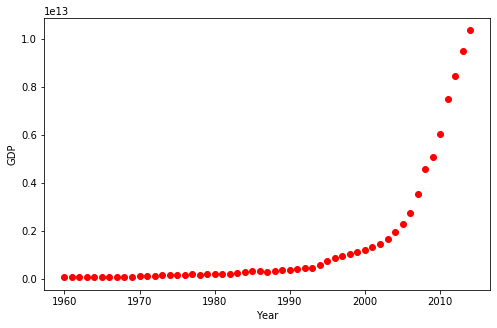

In [20]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

Bu grafiğe ilk baktığımızda bir lojistik fonksiyonun bu grafiğe uyabileceğini görürüz. Aşağıdaki gibi

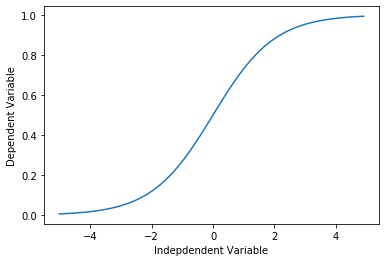

In [21]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

Yukarıdaki grafik aşağıdaki lojistik fonksiyonun grafiğidir:

$$ \hat{Y} = \frac1{1+e^{\beta_1(X-\beta_2)}}$$

$\beta_1$: Eğrinin eğimi,

$\beta_2$: Eğrinin x ekseni üzendeki noktası.

Regresyon modeli geliştirmek için öncelikli olarak şablon modeli ifade eden bir fonksiyon yazacağız.

In [22]:
def sigmoid(x, Beta_1, Beta_2):
    y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
    return y

Örnek olarak iki Beta değeri için fonksiyonumuzu çizelim doğru fit edip etmediğine bakmak için

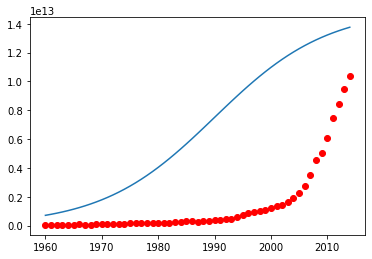

In [23]:
beta_1 = 0.10
beta_2 = 1990.0

#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

Pekte iyi fit etmedi. Asıl problemde bu. En iyi uyum sağlayacak değerleri bulmaya çalışacağız. Bunun için öncelikli olarak değerlerimizi normalize edelim.

In [24]:
# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

***En iyi tahmin için "Grafiğe en iyi uyan fonksiyonu bulmak için"*** <code>scipy.optimize içindeki curve_fit</code> metodunu kullanacağız. 

In [26]:
from scipy.optimize import curve_fit
popt,pcov=curve_fit(sigmoid,xdata,ydata)
#Bulunan parametreleri görelim
print("beta_1=%f, beta_2=%f" % (popt[0],popt[1]))

beta_1=690.451711, beta_2=0.997207


Bulduğumuz sonuca göre grafiğimizi tekrar çizelim

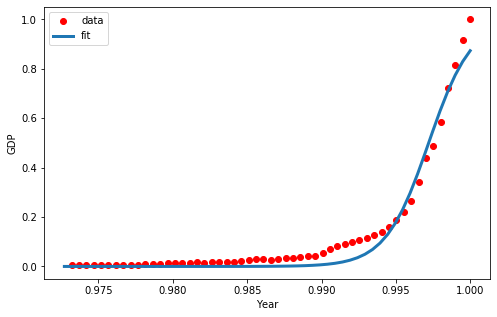

In [27]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

***Bulduğumuz modelin değerlendirelim***

In [29]:
# Train ve test olarak verimisi ayıralım
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# modelimizi oluşturalım
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# test verisi üzerinden tahminlerimizi yapalım
y_hat = sigmoid(test_x, *popt)

# Değerlendirme
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

Mean absolute error: 0.04
Residual sum of squares (MSE): 0.00
R2-score: 0.97


0.97 R2 score çok iyi bir sonuç